<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/ejer2_0_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística con gradiente descendente

 La regresión logística es un algoritmo de clasificación de aprendizaje supervisado, lo que significa que puede estimar la clase de nuevas observaciones en función de observaciones etiquetadas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import seaborn as sbn
%matplotlib inline

## Conjunto de datos (sintéticos)

supongamos 10 observaciones y dos características y dos clases (clasificación binaria).

In [ ]:
X, y = make_classification(
        n_samples=10,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=1,
        n_clusters_per_class=1)
print(X)
print(y)

[[-0.64185521  0.78535215]
 [ 0.10972634  1.83671408]
 [-1.07362634  2.591487  ]
 [-1.38222372  0.85340843]
 [ 1.78689446  2.3841826 ]
 [ 0.94785273  3.53015683]
 [ 1.08876018  1.35925144]
 [ 0.42774158  3.54015499]
 [-0.88398194 -0.57876171]
 [-1.59347411  1.2168913 ]]
[1 0 1 1 0 0 0 0 1 1]


Text(0, 0.5, '$X_2$')

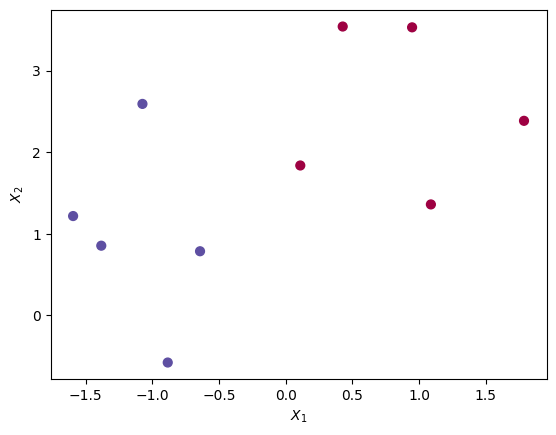

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
# blue dots = 1, red dots = 0

Tenemos 10 observaciones $X$ con dos características, el vector $\theta$ tendrá tres elementos contando el intercept y conocemos también el vector objetivo (etiqueta) $y$. Podemos predecir el valor (prob) de una nueva observación??

## Regresión Logística

Intentamos modelar la probabilidad de que una observación pertenezca a una categoría particular.
Para generar estas probabilidades, la regresión logística utiliza la función **sigmoide**. Esta función asigna un número real a valores entre 0 y 1.
\begin{equation}
g(z) = \frac{1}{1+e^{-z}}
\end{equation}

Podemos definir nuestra   hipótesis como sigue, $h(X) = g(X \theta)$
donde:
- $\theta$ es el vector de coeficientes
- $X$ es el vector de todas las observaciones al cual le añadimos una columna de 1 para calcular el primer valor del vector $\theta$.

$h(X)$  nos da la probabilidad de que nuestra salida sea 1, lo que significa:
- Si $ X \theta \geqslant 0 $, entonces $h(X) \geqslant 0.5$, entonces la predicción es $y = 1$
- Si $ X \theta < 0 $, entonces $h(X) < 0.5$, entonces la predicción es $y = 0$

Ponemos nuestra columna de 1 al inicio de las caractrerísticas


Plotting the decision boundary
As there are two features in our dataset, the linear equation can be represented by,

<img width="200" height="20" src="data:image/png;base64, UklGRvAGAABXRUJQVlA4WAoAAAAIAAAA7AAAGAAAVlA4IBAGAABQIQCdASrtABkAPm0ylEgkIqIhJFgLEIANiWkAFeG/0Ts+/rX40dbl4oeYPwz8Erz78qPV/+W8AF+N/zL+9b0+AD8o/rv9p/MLywv1X0K+of+W+yX5K/yT/Ffl36oHgDfLf7z+oHwAfyH+Q/6D+4/jl8Lf9z/jvN3+Zf3j/Tf3H4Bv5R/Qf8z/b/73+0Hfe/cD2QP09BAqRlUBm5ePqydaYK5+yNJlNikJxCBOu+s9HfV5Q4/J3bu9sqLajyXcHBcHnzZtIjbFWcrJKnke8MZURURBpelzoQ+7e8WfT9gRYziFCGKr3XsXtn2iAtKH/a5LA7WwP9XSGyNtLi9QH6zTYbjAg2pdQNbBeSSUPFp742pAAAD+Rv8iGaP5J8lwWuMwlbS3WfPxXshKrftiyyc28ZHpSYru1Nhi24+oxE7zTjV7HJtEePjMggFR5zESe+uzSVKDmD8lKSaADPoJuc2m9QbUSOtDheCSEf0FNApijs5D2CEgkUtx0pt6Ld4wFQ1U2pcJJ/YoeAPALEOB+PWP10a4SXqposDfzR0zMZSAdagDVUOFcjdG+jG/5kurs7WyFuLh9gbe4yrndLbaCY+tSU63uByDdCQlziAMiMHqz/LBEJEU4IpMwTAel7mXAc5VU01TWXVXFEayeoT9oK8+m6u6gWqcp+KwHa09BH3EuUYUY3Xr+j9h88wzp+ug4nbYRe4wlXjtQi2evCB+8o8ifrX6kve0woU1UAjqc/F3KcYZAY2TGUoPCl9HyUIJDL2xGvZfU4IgHckEYXC74xmYBLMtvIOn3E3pnjaobcelY/RDVeXLiJFRFODk2su3f+xfXi/Dfk9VNxKrCsofxgC7nHA7M+PhTZFYjEVl/1BWyttaNdOT0d+jly0wHpoFR4YbbBwa/y/5lUnLPwPo9Kj8mETO/6xf91ybTlnwSP6EELYyqTdOKc38MZtzwR6EDj8vSkYb93GvltKcDNnOHz+M9yUuyqrMPVZ7mH0/pG/o/smHeNIBfUmx4RiVoUXX3TS2S8goD80bWB8bRusi8W+BwA0nH/lxQ8Qmm9rZ1uvuyzQuEZ7proxS4GnUGrhDR3Cfu2f46/mbA7e8Bgp86+DDCnhXu8euqqGCR8Jm64tLA8UybtOJt2gHIj8XdJjYeUKvkahNfFOoXWtKGTmMoF7sZKczWTKNSPo9Sisl79Z8CEknLcGLMb1ZqzQ6oT0502BLVTzg0aHQvEyfEDh5yI5m6oGDpTrJ2eK9cQodx9Lg/KJQljWrlFUBZMpphjiL3M6Ew0UJ7R3kTurbxP7k3inZeaM7//zMTOp8SxFCnl0H7IknrTTMTt84blFgWQEjzX03VMCvu39P3dJM4vEsJ0O2cSG58k6i2NL79mvQ4+DMxToWfhiZkFANi3zXyDxY9JwvAmgwmc3D36FX5kL10SPIQXwSpTXNNYcyKxgW/qoNpk66o1KHUnM7YoMvC94DnN6FMDUTc4LIStv8OGIb4wV30L1SHPlN1dgHtIInTZOVtykIBfEl8kD6rZSdjbsF5Guk7ZTB/jYcdZ1v43+gIya947CQgJQWKsLtHwsR9dpu/yuSEi9PIJSzMVLVGLrFP+9FHquxC6Q8CaAQUG/8H9sJChioUKPVj5PAm70NSyxD9gRMPSHD+W2AHdzrx8H+bGfr92IHg0djegYdU2paQyfRKgl+0339Gm3tcv01B3fhlyW3m3Cswe/5+IsfIpOFQOs1qarpF1ZXDJXJrdsg8btvK0ifg4wR7To5YlEM+mNbOrIHLk9aDlf8aHWIEa1pbfzPpWIoyHzji52it2eT0KBd2iebaGiwc83ryu/Ve5MbfuntArKVO7qd9Gm4ctuBL/6yOPJCwgPIE+KhDJBn55oyYTIFzjN2kYyGyHg/yB35OuyhkHniOQDVtWlxGRo7wPbW9sCHu5HwV3mbwrwdCKlL4EjlNkBBm0rE+GKXre4dSoglfA+Jhv8Ort8lX6P+i+XuHBoUH71GqRI2Ohf+mGs69RkrK7axYulGn0agNcmgOFcJbTWwzlB6aKZF/ym+xtovRomG/MkP1fjxON2cAAAARVhJRroAAABFeGlmAABJSSoACAAAAAYAEgEDAAEAAAABAAAAGgEFAAEAAABWAAAAGwEFAAEAAABeAAAAKAEDAAEAAAACAAAAEwIDAAEAAAABAAAAaYcEAAEAAABmAAAAAAAAAEgAAAABAAAASAAAAAEAAAAGAACQBwAEAAAAMDIxMAGRBwAEAAAAAQIDAACgBwAEAAAAMDEwMAGgAwABAAAA//8AAAKgBAABAAAA7QAAAAOgBAABAAAAGQAAAAAAAAA="/>  
As discussed earlier, the decision boundary can be found by setting the weighted sum of inputs to 0. Equating h(x) to 0 gives us,  
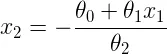


In [ ]:

def add_ones(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [ ]:
#función sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
#xálculo de la hypòtesis
def calc_h(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

In [ ]:
XX = add_ones(X)
theta = np.zeros(XX.shape[1])
h = calc_h(XX, theta)

In [ ]:
print(XX)
print(theta)
print(h)

[[ 1.         -0.64185521  0.78535215]
 [ 1.          0.10972634  1.83671408]
 [ 1.         -1.07362634  2.591487  ]
 [ 1.         -1.38222372  0.85340843]
 [ 1.          1.78689446  2.3841826 ]
 [ 1.          0.94785273  3.53015683]
 [ 1.          1.08876018  1.35925144]
 [ 1.          0.42774158  3.54015499]
 [ 1.         -0.88398194 -0.57876171]
 [ 1.         -1.59347411  1.2168913 ]]
[0. 0. 0.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


<img width="600" height="100" src="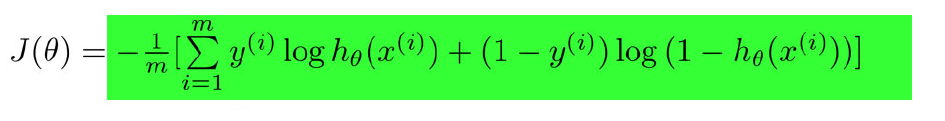 "/>

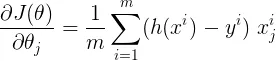

# Función de Coste

Como se vió en clase para la regresión logística se define como,
\begin{equation}
J(\theta) = \frac{1}{m}(-y \log(h) - (1 - y) \log(1 - h))
\end{equation}
siendo $m$ es el número de observaciones.

Esta función penañiza las observaciones mal clasificadas, por ejemplo:  
- si $y=0$ y $h\rightarrow 1$, entonces $J(\theta)\rightarrow ∞$  (penalización fuerte)
- si $y=0$ y $h\rightarrow 0$, entonces $J(\theta)\rightarrow 0$  (penalización débil)
- si $y=1$ y $h\rightarrow 0$, entonces $J(\theta)\rightarrow ∞$  (penalización fuerte)
- si $y=1$ y $h\rightarrow 1$, entonces $J(\theta)\rightarrow 0$  (penalización débil)

In [ ]:
cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
print(cost)

0.0020532776926143743


## Gradiente descendente

Para poder hacer una predicción adecuada, necesitamos minimizar la función de pérdida $J(\theta)$ y encontrar los valores del vector de coeficientes  $\theta$ que hacen mínima esta función. Para ello tenemos que calcular las derivadas de la función de coste respecto de cada coeficiente  $\theta$.  Este procedimiento se denomina  *Gradiente Descendente*.
\begin{equation}
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
\end{equation}
Siendo $\alpha$ es la tasa de aprendizaje.

Se puede demostrar que
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} X^T (h - y)
\end{equation}

In [ ]:
m = y.size
alpha = 0.01
theta = np.zeros(XX.shape[1])


In [ ]:
print(theta)

[0. 0. 0.]


## Entrenamiento del modelo

a fin de encontrar los coeficientes del modelo, es decir los elementos del vector $\theta$, debemos proceder a realizar el gradiente descendente de forma iterativa

In [ ]:
import  math
num_iter = 600000
epsilon = 10e-9
J_vals = []
prev = math.inf
for i in range(num_iter):
    h = calc_h(XX, theta)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    J_vals.append(cost)
    if(abs( J_vals[i]- prev) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
    prev = J_vals[i]
    gradient = np.dot(XX.T, (h - y)) / m
    theta -= alpha * gradient
    if i % 20000 == 0:
        print('iteracion ',i,'coste ', cost)

print('Adjusted coefficient: {}'.format(theta))

iteracion  0 coste  0.6931471805599453
iteracion  20000 coste  0.016869055503776965
iteracion  40000 coste  0.009315820714618188
iteracion  60000 coste  0.0064528709248223345
iteracion  80000 coste  0.004938723667775568
iteracion  100000 coste  0.00400078405098816
iteracion  120000 coste  0.0033624486205240654
iteracion  140000 coste  0.002899851796632355
iteracion  160000 coste  0.0025491718231981796
iteracion  180000 coste  0.0022741652026607028
Convergencia Alcanzada ! 199942  iteraciones
Adjusted coefficient: [ 0.6671577  -9.83351445 -2.26794714]


## Variación de la función de pérdida

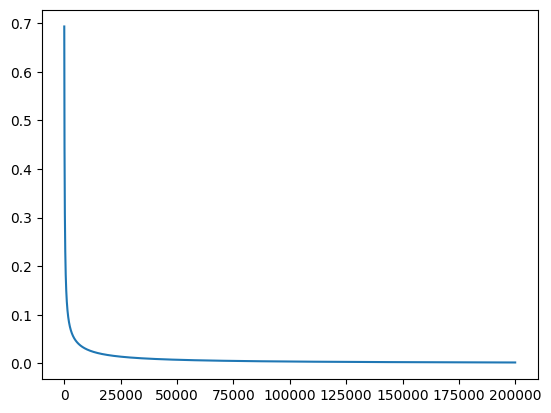

In [ ]:
plt.plot(range(len(J_vals)), J_vals)

Como esperábamos la función de pçerdoda decrece.

## Realizando predicciones

Calculemos las predicciones, es decir la probabilidad para cada observación.

In [ ]:
preds_prob = calc_h(XX, theta)
print(preds_prob)

[9.94501209e-01 1.01768745e-02 9.95261677e-01 9.99995555e-01
 2.04287070e-10 5.81770463e-08 2.00093961e-06 9.46472211e-06
 9.99976825e-01 9.99998730e-01]


El límite de decisión para la sigmoide es 0.5 con lo que podemos redondear las probabilidades para asignar la clase de cada observación.

In [ ]:
preds = preds_prob.round()
print(preds)

[1. 0. 1. 1. 0. 0. 0. 0. 1. 1.]


Calculemos la medida de la precisión para estos datos de entreamiento.

In [ ]:
score_numpy = (preds == y).mean()
print('Score Numpy: {}'.format(score_numpy))

Score Numpy: 1.0


No es muy informativo ya que hemos entrebado y probado con los mismos datos y los mismos valores objetivos $y$. Veams que sucede con una nueva onservación.

In [ ]:
new_x = np.array([1, -0.8, 0.8])   # nuevo dato (-0.8, 0.8)  le adicionamos 1
print(new_x)
preds_prob_new_x = calc_h(new_x, theta).round()
print("predicción para la salida de la nueva observación: ", preds_prob_new_x)

[ 1.  -0.8  0.8]
predicción para la salida de la nueva observación:  1.0


## Recta de decisión

Plotting the decision boundary
As there are two features in our dataset, the linear equation can be represented by,


As discussed earlier, the decision boundary can be found by setting the weighted sum of inputs to 0. Equating h(x) to 0 gives us,

In [ ]:
theta

array([ 0.6671577 , -9.83351445, -2.26794714])

In [ ]:
sbn.scatterplot(x = 'exam 1', y = 'exam 2', hue = 'admitted', data =data)
decision_boundary = -(w[0] + (w[1]/100)*data['exam 1'])/(w[2]/100)
plt.plot(data['exam 1'], decision_boundary)

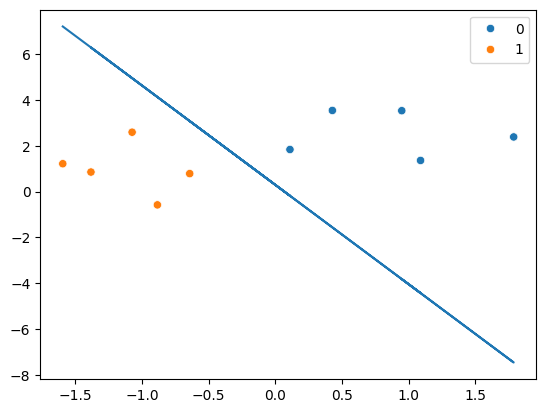

In [ ]:
sbn.scatterplot(x = X[:, 0], y=X[:, 1], hue = y)
decision_boundary = -(theta[0] + theta[1]*X[:, 0])/theta[2]
plt.plot(X[:, 0], decision_boundary)

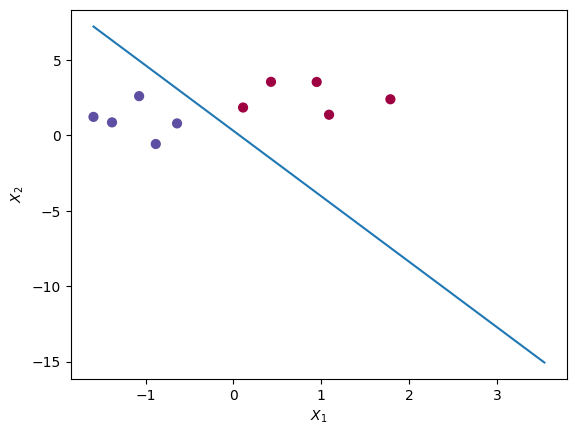

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

x_values = [np.min(X[:, 0] ), np.max(X[:, 1] )]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]

plt.plot(x_values, y_values, label='Decision Boundary')


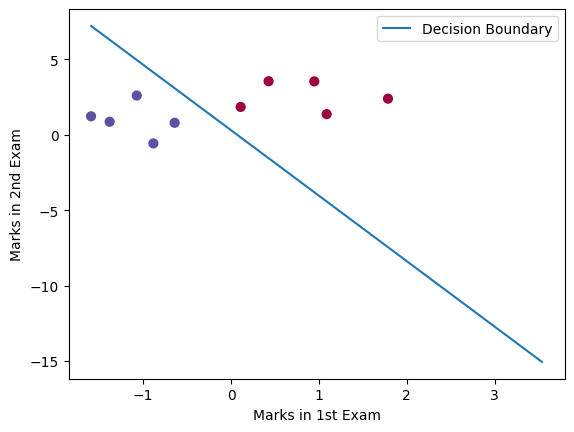

In [ ]:
x_values = [np.min(X[:, 0] ), np.max(X[:, 1] )]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

## Sklearn implementation

Of course, logistic regression is already implemented in Scikit-learn.

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
X

array([[-0.64185521,  0.78535215],
       [ 0.10972634,  1.83671408],
       [-1.07362634,  2.591487  ],
       [-1.38222372,  0.85340843],
       [ 1.78689446,  2.3841826 ],
       [ 0.94785273,  3.53015683],
       [ 1.08876018,  1.35925144],
       [ 0.42774158,  3.54015499],
       [-0.88398194, -0.57876171],
       [-1.59347411,  1.2168913 ]])

In [ ]:
model = LogisticRegression(max_iter=300000)
model.fit(X, y)
preds = model.predict(X)

score_sklearn = (preds == y).mean()
print('Score Sklearn: {}'.format(score_sklearn))
print(model.intercept_, model.coef_)
print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(X)))

Score Sklearn: 1.0
[0.8674912] [[-1.33248068 -0.61986477]]
Confusion matrix : [[5 0]
 [0 5]]


In [ ]:
new_x = np.array([-0.8, 0.8])
new_x = new_x.reshape(1, -1)
preds = model.predict(new_x)
preds

array([1])